# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [2]:
df = pd.read_csv('data/comprar_alquilar.csv')
df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [4]:
df.describe(include='all')

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada varaible, diferenciando por colores el target (*comprar*).

In [5]:
import seaborn as sns

<AxesSubplot: xlabel='hijos', ylabel='gastos_otros'>

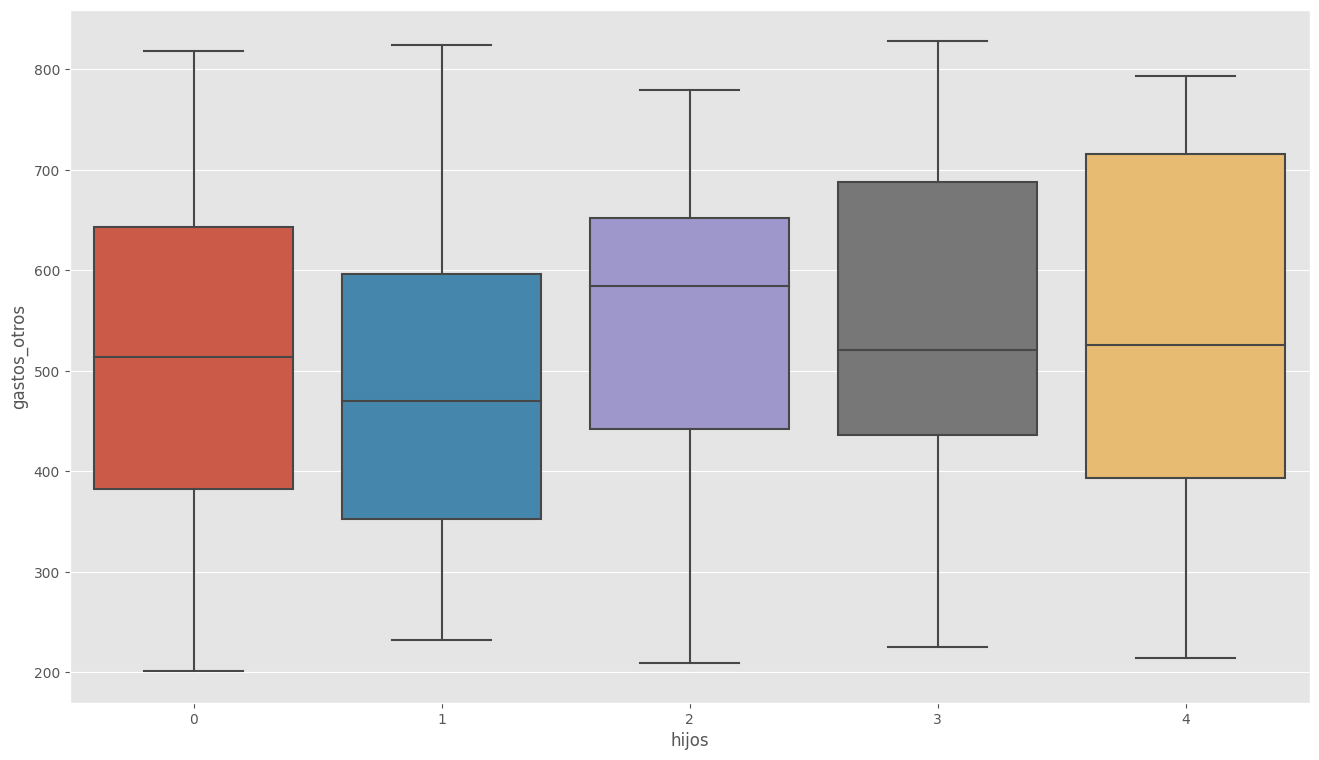

In [6]:
sns.boxplot(df[['gastos_comunes', 'gastos_otros', 'hijos']], x='hijos', y='gastos_otros')

<AxesSubplot: xlabel='hijos', ylabel='ahorros'>

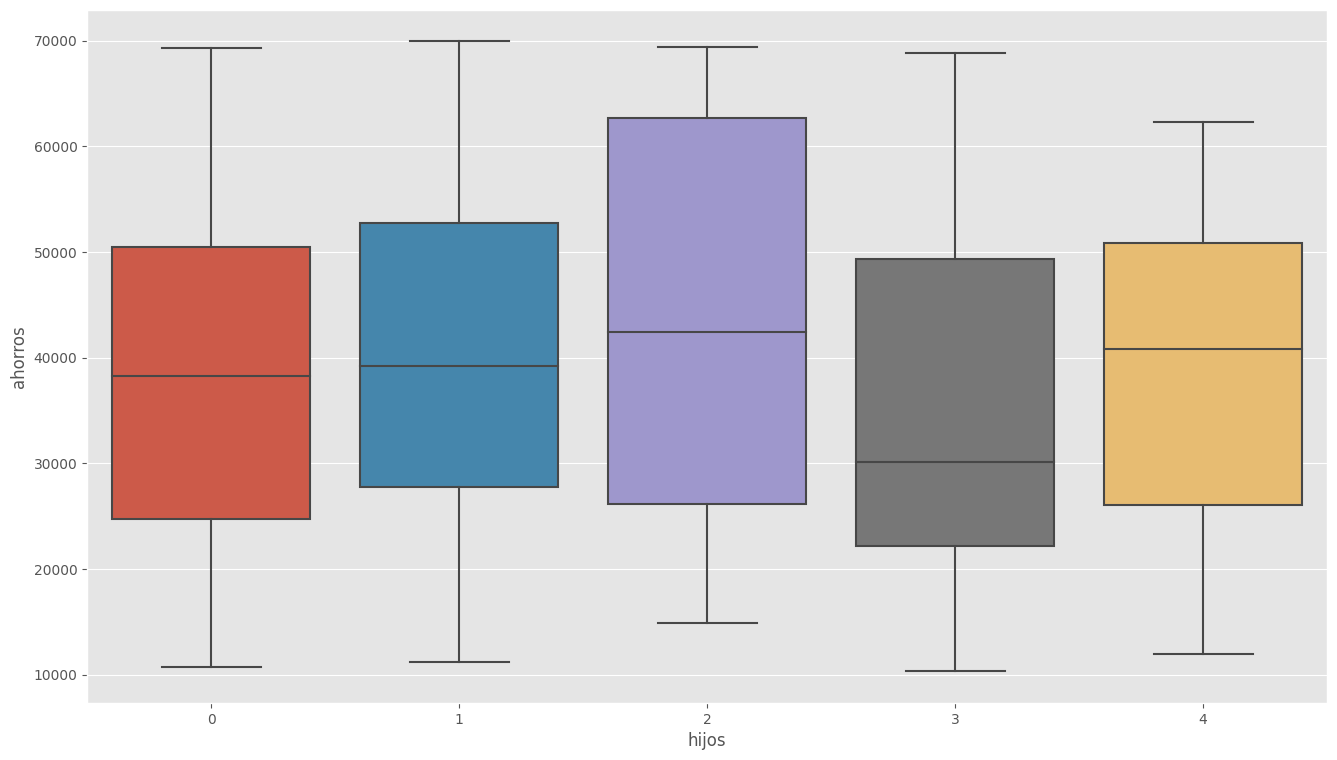

In [7]:
sns.boxplot(df[['gastos_comunes', 'ahorros', 'hijos']], x='hijos', y='ahorros')

<AxesSubplot: xlabel='hijos', ylabel='gastos_otros'>

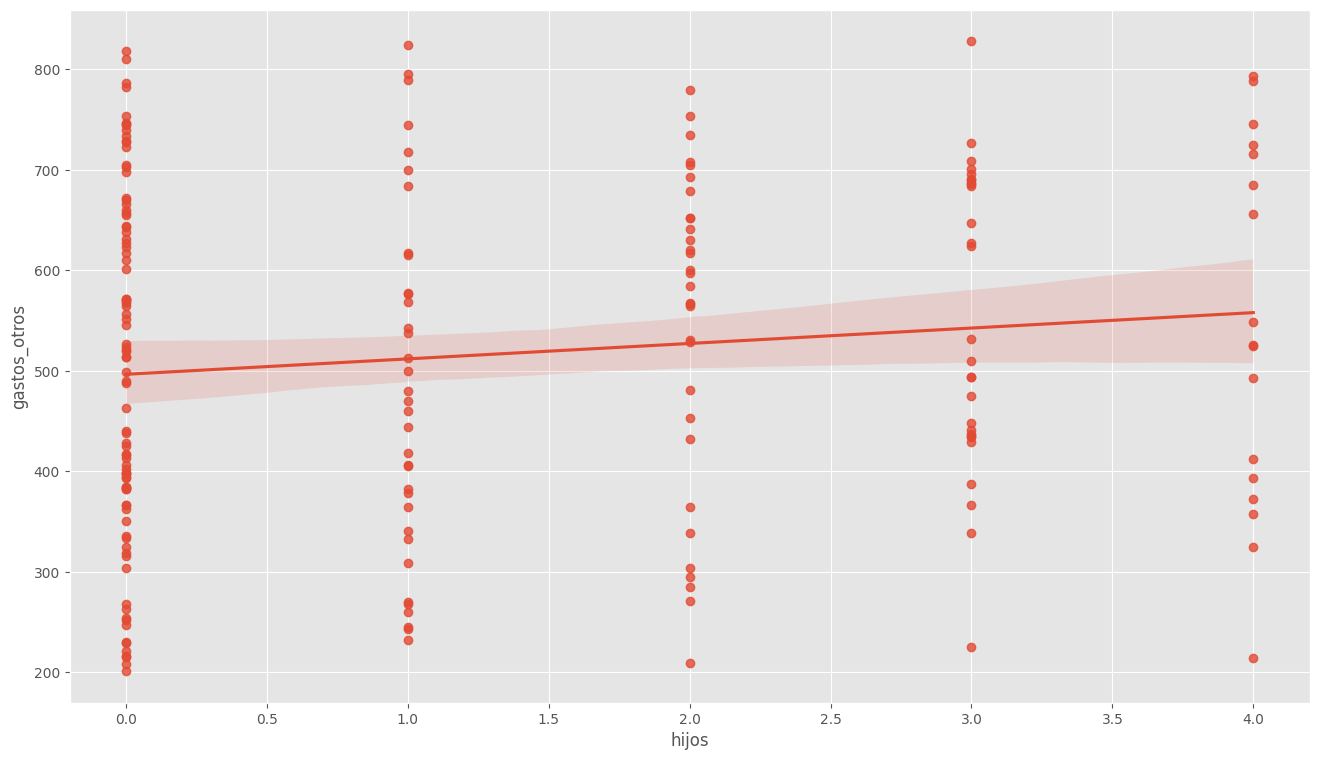

In [8]:
sns.regplot(df, x='hijos', y='gastos_otros')

<AxesSubplot: xlabel='comprar', ylabel='ahorros'>

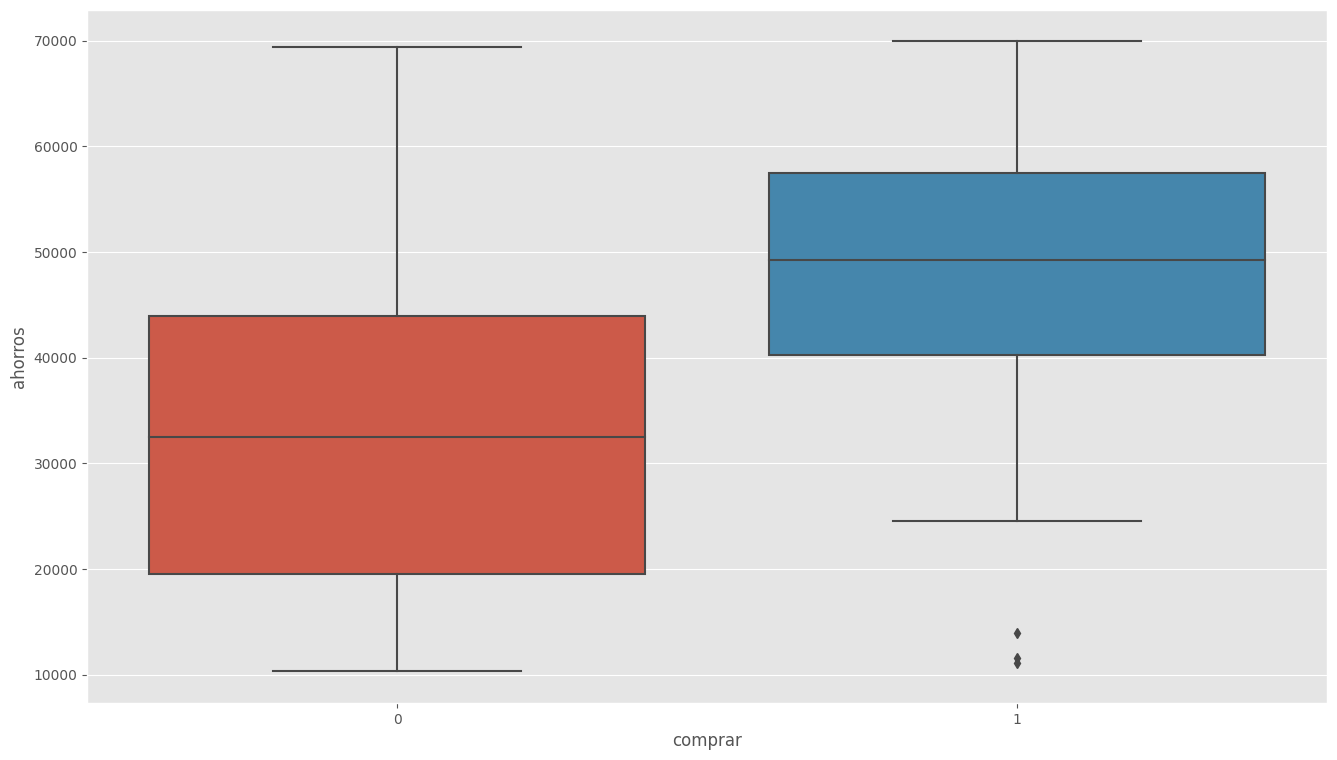

In [9]:
sns.boxplot(df[['gastos_comunes', 'ahorros', 'comprar']], x='comprar', y='ahorros')

In [10]:
df.shape[1]

10

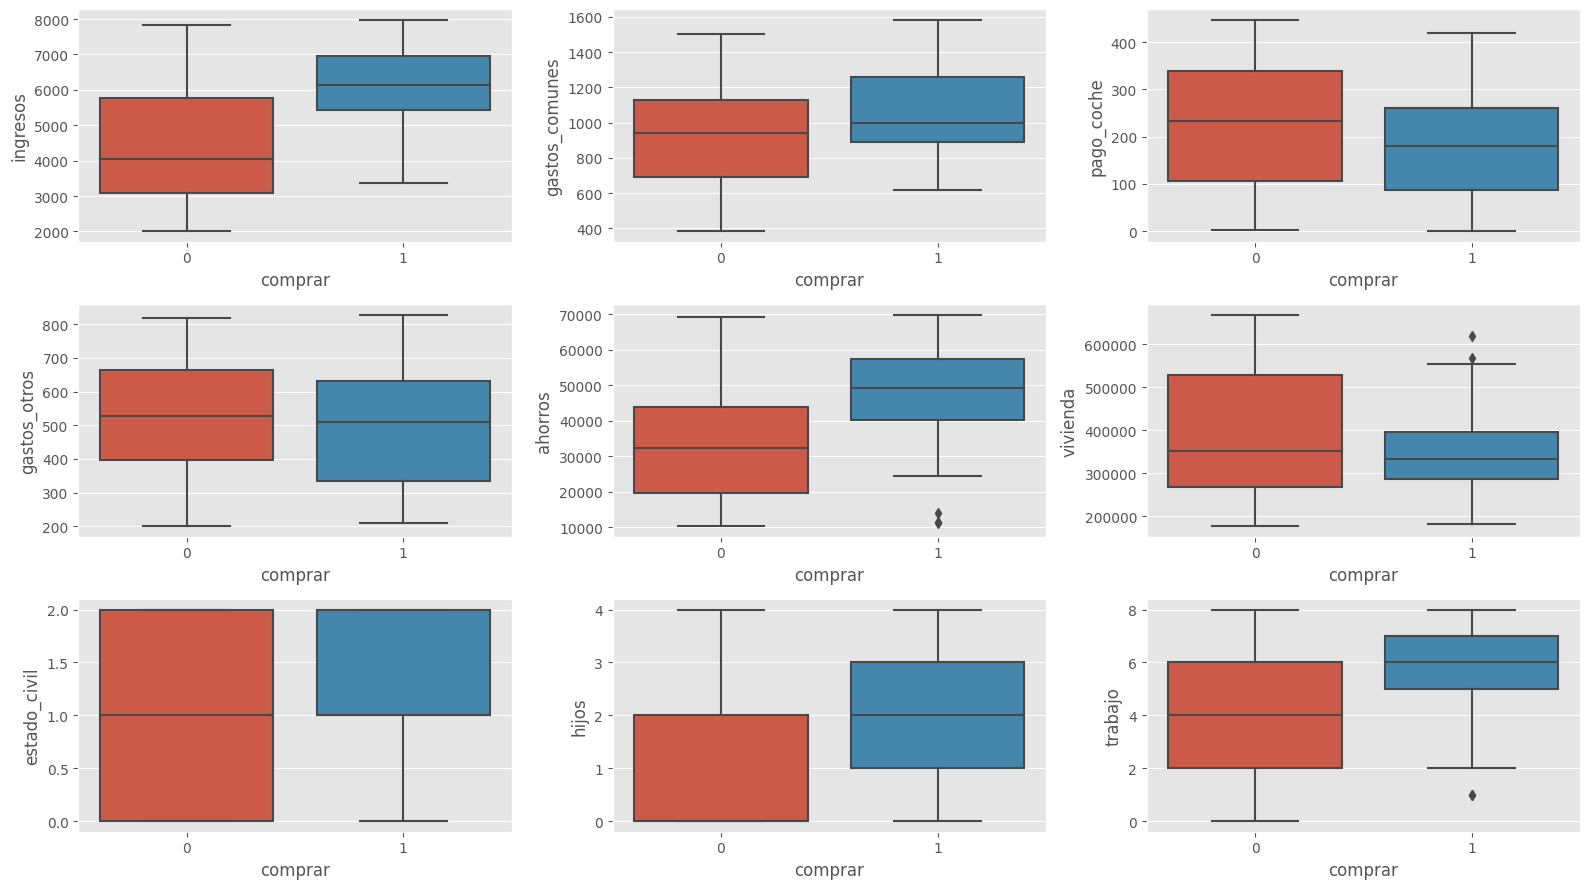

In [11]:
fig, ax = plt.subplots(3,3)
cols_not_comprar = df.columns.drop('comprar')

for col, axx in zip(cols_not_comprar, ax.reshape(-1)):
    sns.boxplot(df, x='comprar', y=col, ax=axx)

plt.tight_layout()

<AxesSubplot: >

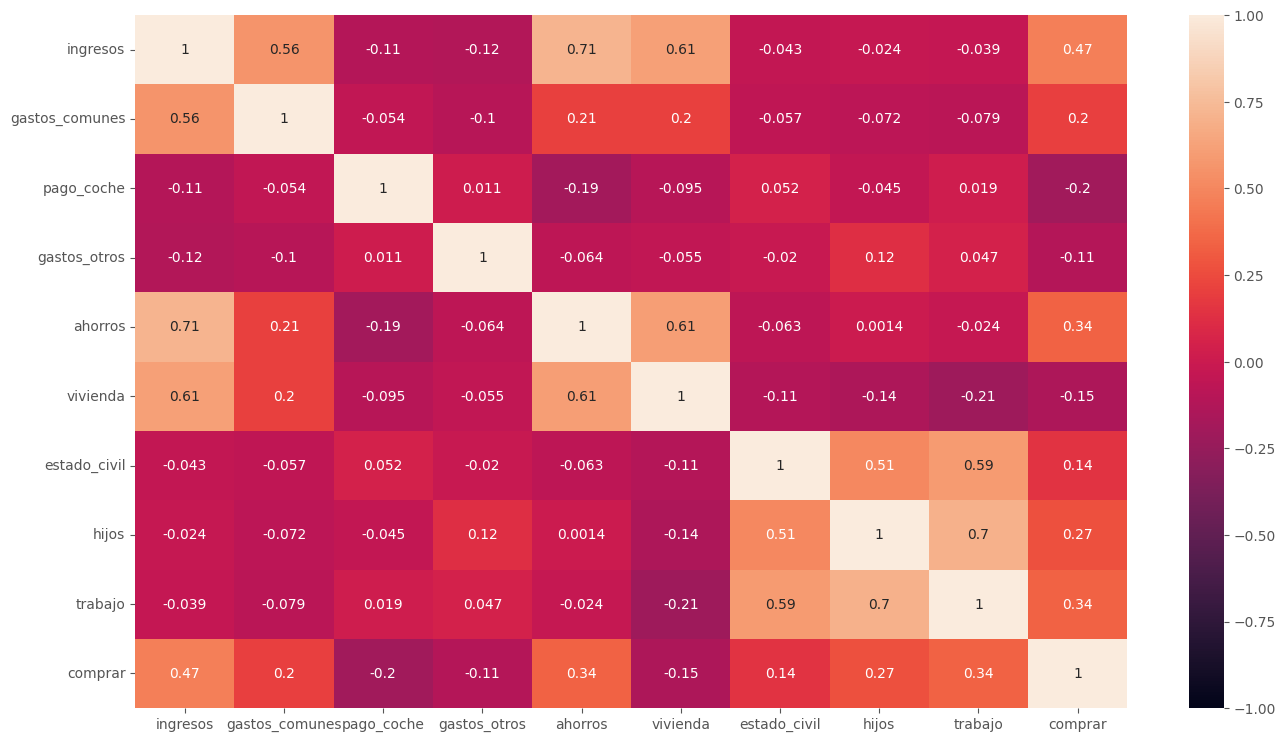

In [12]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [13]:
# sns.boxplot(df[['gastos_comunes', 'gastos_otros']])

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [14]:
X = df.drop(columns='comprar').copy()
y = df['comprar'].copy()

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
197    0
198    0
199    0
200    0
201    0
Name: comprar, Length: 202, dtype: int64

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [16]:
pca_model = PCA(n_components=9, random_state=0)
pca_model.fit(X_sc)

PCA(n_components=9, random_state=0)

### Veamos cuántos buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [17]:
pd.DataFrame(pca_model.explained_variance_, index=[f'PC_{n}' for n in range(1, pca_model.n_components_ + 1)])

,0
PC_1,2.705614
PC_2,2.106974
PC_3,1.059256
PC_4,0.966491
PC_5,0.871489
PC_6,0.509209
PC_7,0.374958
PC_8,0.272955
PC_9,0.177831


In [18]:
pd.DataFrame(pca_model.explained_variance_ratio_ * 100, index=[f'PC_{n}' for n in range(1, pca_model.n_components_ + 1)])

,0
PC_1,29.913557
PC_2,23.294923
PC_3,11.711241
PC_4,10.685622
PC_5,9.635279
PC_6,5.629866
PC_7,4.145579
PC_8,3.017819
PC_9,1.966115


In [19]:
pd.DataFrame(np.cumsum(pca_model.explained_variance_ratio_)*100, index=[f'PC_{n}' for n in range(1, pca_model.n_components_ + 1)])

,0
PC_1,29.913557
PC_2,53.208480
PC_3,64.919721
PC_4,75.605343
PC_5,85.240621
PC_6,90.870487
PC_7,95.016066
PC_8,98.033885
PC_9,100.000000


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

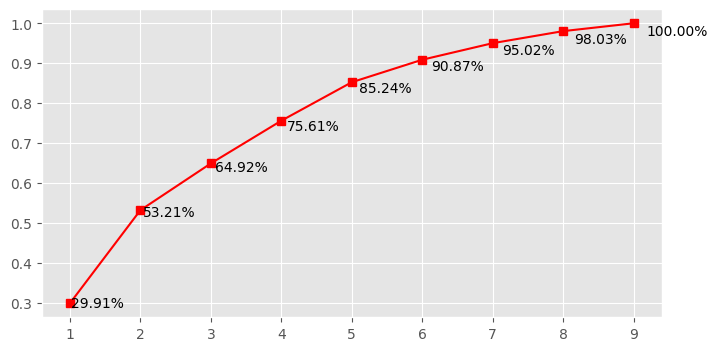

In [22]:
plt.figure(figsize=(8, 4))
y_ = np.cumsum(pca_model.explained_variance_ratio_)
x = np.arange(1, pca_model.n_components_ + 1)
plt.plot(x, y_, 'sr-')

for xx, yy in zip(x, y_):
    plt.annotate(f'{yy:.2%}', xy=(1.02*xx, 0.97*yy))

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

In [ ]:
df_loads = pd.DataFrame(pca_model.components_, columns=X.columns, index=[f'PC_{n}' for n in range(1, pca_model.n_components + 1)])

<AxesSubplot: >

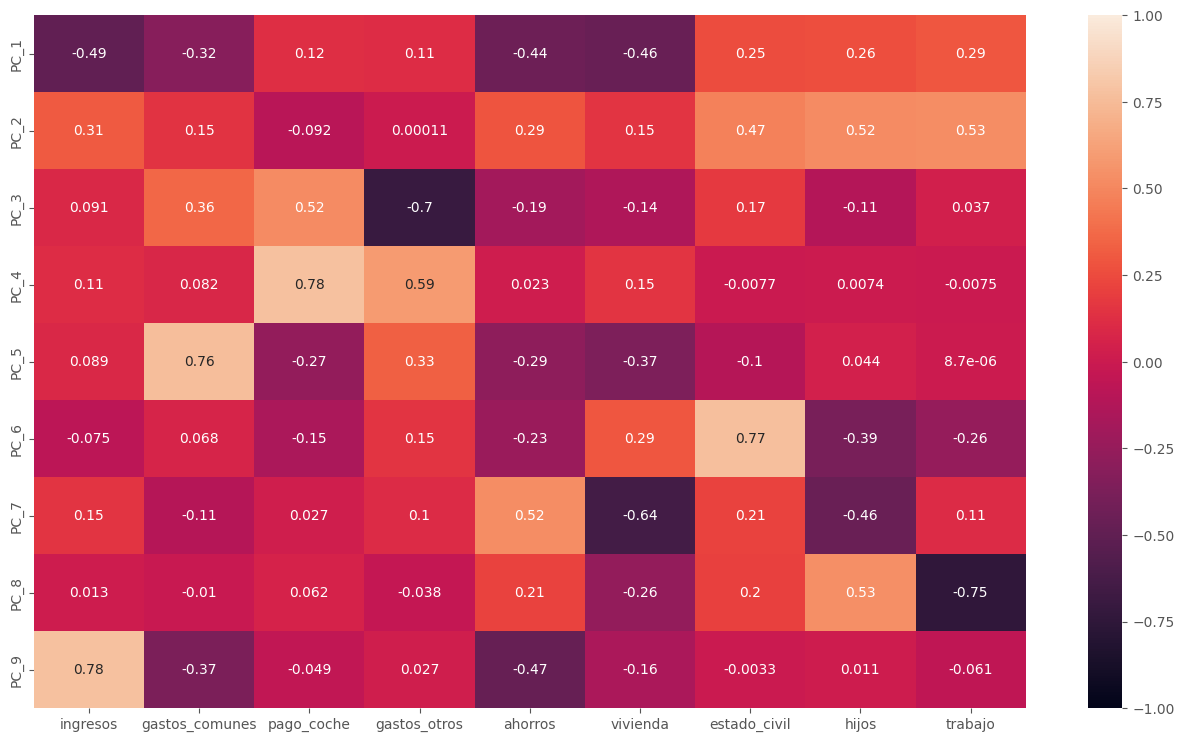

In [ ]:
sns.heatmap(df_loads, vmin=-1, vmax=1, annot=True)

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - KNN con 3 vecinos
3. Entrena
4. Predice en test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()),
                    ('pca', PCA(n_components=5, random_state=0)),
                    ('knn', KNeighborsClassifier(n_neighbors=3))])


In [28]:
y_train

66     0
26     0
113    0
169    0
63     0
      ..
67     0
192    0
117    1
47     1
172    0
Name: comprar, Length: 161, dtype: int64

In [30]:
pipe.fit(X_train, y_train)

y_train_hat = pipe.predict(X_train)
y_hat = pipe.predict(X_test)


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc_train = accuracy_score(y_train, y_train_hat)
acc_test = accuracy_score(y_test, y_hat)

print(f"ACCURACY EN TRAIN: {acc_train.mean():.2%}")
print(f"ACCURACY EN TEST: {acc_test.mean():.2%}")

ACCURACY EN TRAIN: 91.30%
ACCURACY EN TEST: 80.49%


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()),
                    ('pca', PCA(n_components=6, random_state=0)),
                    ('knn', KNeighborsClassifier(n_neighbors=5))])

pipe.fit(X_train, y_train)

y_train_hat = pipe.predict(X_train)
y_hat = pipe.predict(X_test)

acc_train = accuracy_score(y_train, y_train_hat)
acc_test = accuracy_score(y_test, y_hat)

print(f"ACCURACY EN TRAIN: {acc_train.mean():.2%}")
print(f"ACCURACY EN TEST: {acc_test.mean():.2%}")

ACCURACY EN TRAIN: 88.82%
ACCURACY EN TEST: 87.80%
